<a href="https://colab.research.google.com/github/19PA1A0575/VITBML-EDA1/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

### Generating data 'X' ranges between -10 to 10 
### 'Y' is a linear combination of parameters as Y = ax+b+gaussian(0,epsilon)

In [0]:
Number_of_points = 1000
X_data = np.linspace(-10,10,Number_of_points)
W0_true = 11
W1_true = 4.5
Y_data = W1_true*X_data + W0_true + np.random.normal(0,0.5,Number_of_points)

### Split the data into training and testing set

In [0]:
Number_of_training = int(Number_of_points*0.8)
Number_of_testing = int(Number_of_points*0.2)
index = np.random.permutation(Number_of_points) #A random permutation of 1..N is generated

In [0]:
X_train = X_data[index[:Number_of_training]] 
Y_train = Y_data[index[:Number_of_training]]

In [0]:
X_test = X_data[index[Number_of_training:]]
Y_test = Y_data[index[Number_of_training:]]

### Plot the data points

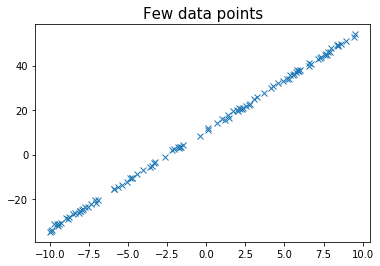

In [6]:
import matplotlib.pyplot as plt
def plot(x,y,title):
    fig,(ax1) = plt.subplots(1)
    if title!='Loss':
        ax1.plot(x,y,'x')
    else:
        ax1.plot(x,y)
        
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    
def plot_curve(x,y,W0,W1,title):
    fig,(ax1) = plt.subplots(1)
    #ax1.plot(x,y,'x')
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    y = W0 + W1*x
    #ax1.plot(x,y,'o')
    ax1.plot([X_data[0],X_data[-1]],[W0_true+W1_true*X_data[0],W0_true+W1_true*X_data[-1]],color = 'blue')
    ax1.plot([X_data[0],X_data[-1]],[W0+W1*X_data[0],W0+W1*X_data[-1]],color = 'red')

    
plot(X_train[0:100],Y_train[0:100],'Few data points')

### Fitting a 1st order polynomial  of type y = W0 + W1*x. 
We want to learn the parameters W0 and W1. Lets initialize W0 and W1 with random values

In [0]:

def compute_loss(x,y,W0,W1):
    return np.sum(np.power(W0+W1*x - y,2))/(2.0*Number_of_training)
    

### Learning the parameters of the model for some 'N' epochs, by minimizing squared-difference error
$L(W) = \frac{1}{2}\Sigma_{n=1}^{N}(W^Tx_i - y_i)^2$                                                            

Epoch : 0\1000 Train loss: 359.86293570073946
Epoch : 50\1000 Train loss: 63.960036870789025
Epoch : 100\1000 Train loss: 50.64382737251819
Epoch : 150\1000 Train loss: 45.63658676898936
Epoch : 200\1000 Train loss: 41.30080511508309
Epoch : 250\1000 Train loss: 37.383082234217106
Epoch : 300\1000 Train loss: 33.83838419371353
Epoch : 350\1000 Train loss: 30.631062605788657
Epoch : 400\1000 Train loss: 27.729003108220994
Epoch : 450\1000 Train loss: 25.10315178079965
Epoch : 500\1000 Train loss: 22.727220064873226
Epoch : 550\1000 Train loss: 20.57742146051336
Epoch : 600\1000 Train loss: 18.63223338615385
Epoch : 650\1000 Train loss: 16.872181706449044
Epoch : 700\1000 Train loss: 15.279645768117382
Epoch : 750\1000 Train loss: 13.838681991813232
Epoch : 800\1000 Train loss: 12.53486425392536
Epoch : 850\1000 Train loss: 11.355139460293717
Epoch : 900\1000 Train loss: 10.287696865929458
Epoch : 950\1000 Train loss: 9.321849832439979


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


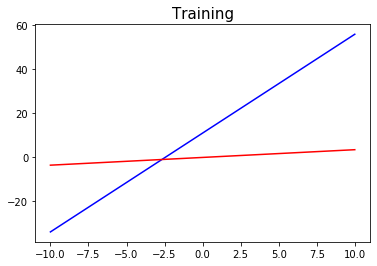

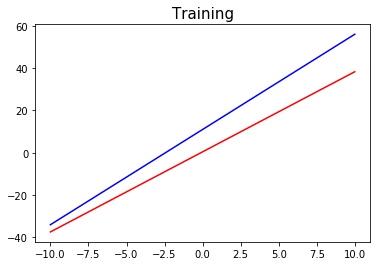

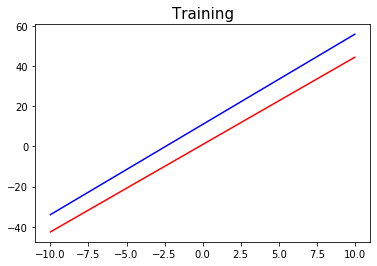

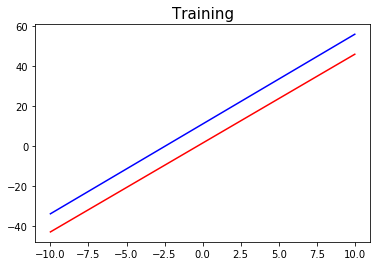

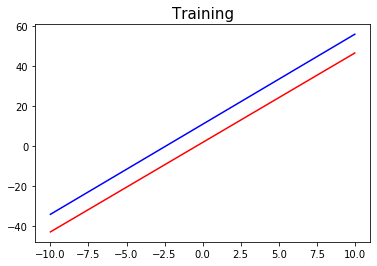

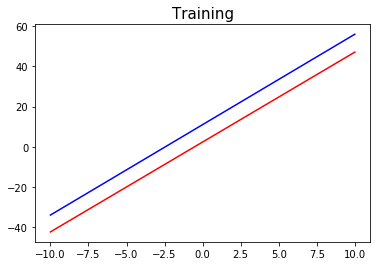

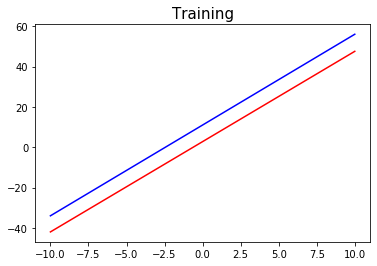

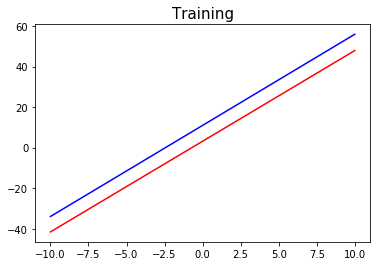

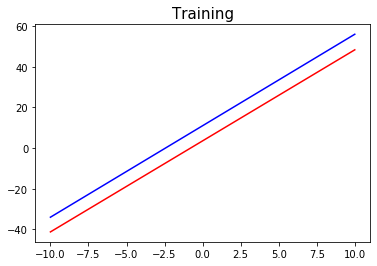

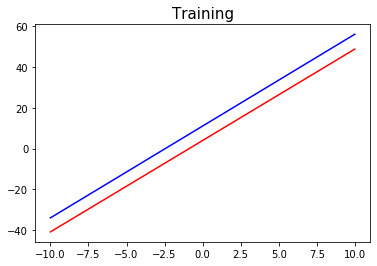

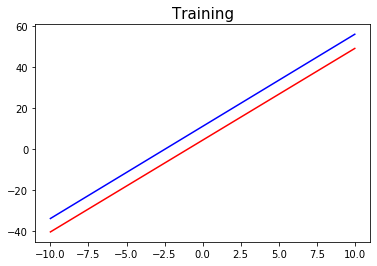

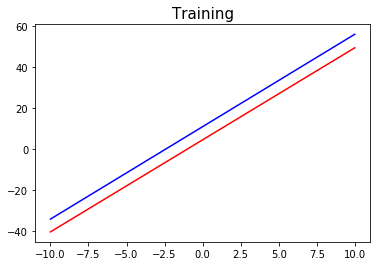

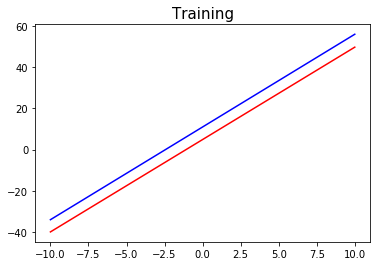

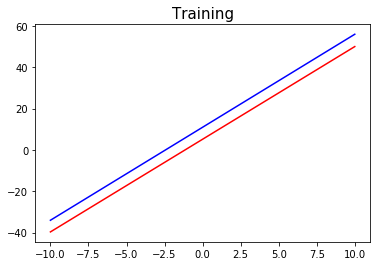

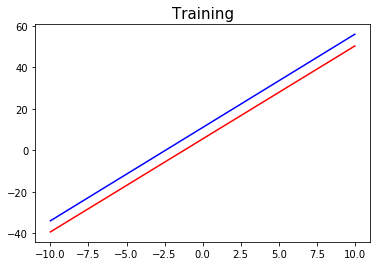

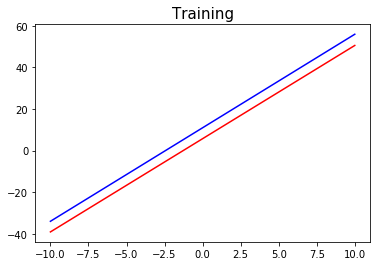

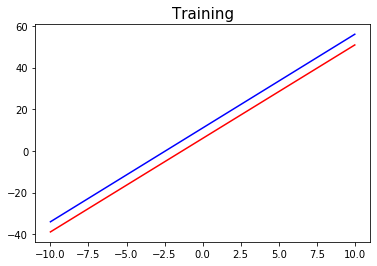

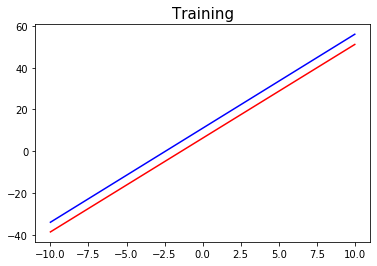

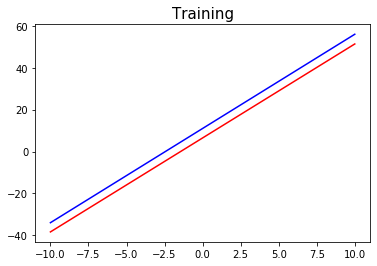

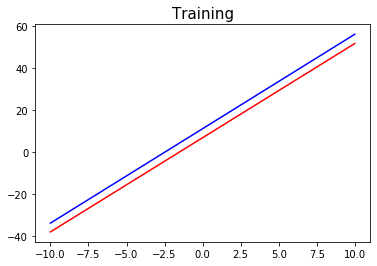

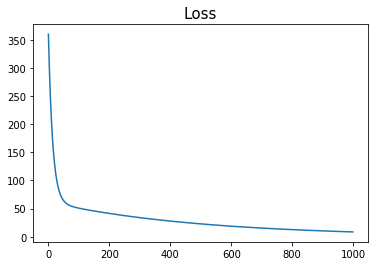

In [8]:
Epochs = 1000
learning_rate = 0.001
W0 = np.random.normal(0,0.2,1)
W1 = np.random.normal(0,0.2,1)
Loss = []
for epoch in range(Epochs):
    dW0 = 0;dW1 = 0
    for n in range(Number_of_training):
        dW0 = dW0 + (W0 + W1*X_train[n] - Y_train[n])*1
        dW1 = dW1 + (W0 + W1*X_train[n] - Y_train[n])*X_train[n]
    W0 = W0 - learning_rate*dW0/Number_of_training
    W1 = W1 - learning_rate*dW1/Number_of_training
    Loss.append(compute_loss(X_train,Y_train,W0,W1))
    if epoch%50==0:        
        plot_curve(X_train,Y_train,W0,W1,'Training')
        print("Epoch : "+str(epoch)+"\\"+str(Epochs) + " Train loss: "+str(compute_loss(X_train,Y_train,W0,W1)))
            #plot_curve(X_train,Y_train,W,'Training')


plot(range(len(Loss)),Loss,'Loss')
    
        
    
        
